**Name: Christ-Brian Amedjonekou**  
**Date: 2/25/2019**  
**MAT 4880-D692 (Math Modeling II) Test 1**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Problem 1: Shark vs. Seals Population Model

* Part A: is shown here

**Variables**

$g_{\text{Sharks}} = \text{Growth Rate of the Sharks}$

$g_{\text{Seals}} = \text{Growth Rate of the Seals}$

$c_{\text{Sharks}} = \text{Competition Term for the Sharks}$

$c_{\text{Seals}} = \text{Competition Term for the Seals}$

**Assumptions**

$g_{\text{Sharks}} = 0.03*\text{Sharks} \Big(1 - \frac{\text{Sharks}}{45000}\Big)$

$g_{\text{Seals}} = 0.11*\text{Seals} \Big(1 - \frac{\text{Seals}}{150000}\Big)$

$c_{\text{Sharks}} = + \frac{0.02}{150000}*\text{Sharks} * \text{Seals}$

$c_{\text{Seals}} = - \frac{0.06}{45000}*\text{Sharks} * \text{Seals}$

$\text{Sharks}, \space \text{Seals} \geq 0$

**Objective**

* Finding if Sharks and Seals can coexist in the system.
* If 11% for Seals is incorrect find the minimum growth possible for coexistance

## Packages

In [1]:
import numpy as np
from sympy.solvers import solve, solveset
import sympy as sp
from matplotlib import pyplot as plt
import math as m
import pandas as pd

## Variables

In [2]:
# Growth Rates: (g_Sharks = g_X, Sharks = X); (g_Seals = g_Y, Seals = Y)
X, Y = sp.symbols('X Y')

# I realized after the test so I made the correction. I uzed "X" instead of "Y"
g_X, g_Y = 0.03 * X * (1 - X/45000), 0.11 * Y * (1 - Y/150000) 

# Competition Terms: (c_Sharks = c_X, Sharks = X); (c_Seals = c_Y, Seals = Y)
c_X, c_Y = (0.02/150000)*X*Y, (0.06/45000)*X*Y

# dX/dt and dY/dt
dXdt, dYdt = g_X + c_X, g_Y - c_Y
sp.init_printing()

## Functions

In [3]:
def dX_dt(sharks, seals):
    gX = 0.03 * sharks * (1 - sharks/45000)
    cX = (0.02/150000)*sharks*seals
    diffX_dt = gX + cX
    return diffX_dt


def dY_dt(sharks, seals):
    gY = 0.11 * Y * (1 - X/150000)
    cY = (0.06/45000)*X*Y
    diffY_dt = gY - cY
    return diffY_dt

## Equillibrium Points

* Part B: is shown below via this Equillibrium Section, and Plot Section

In [4]:
solve([dXdt,dYdt], X, Y)

## Nullclines

In [5]:
solve([dXdt], X)[0]

In [6]:
solve([dXdt], X)[1]

In [7]:
solve([dYdt], Y)[0]

In [8]:
solve([dYdt], Y)[1]

## Plot

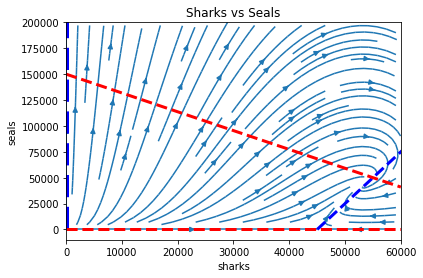

In [9]:
x, y = np.linspace(0, 60000), np.linspace(0, 200000)
X, Y = np.meshgrid(x, y)
U, V = dX_dt(X, Y), dY_dt(X, Y)
X1, X2, Y1, Y2 = 0.2*y + 45000.0, 0 * y, -1.81818181818182*x +150000.0, 0 * x
fig, ax1 = plt.subplots()
ax1.streamplot(X, Y, U, V)
ax1.plot(X1, y, color= 'b', ls= '--', lw= 3, label= 'shark-nullcline')
ax1.plot(X2, y, color= 'b', ls= '--', lw= 6)
ax1.plot(x, Y1, color= 'r', ls= '--', lw= 3, label= 'seal-nullcline')
ax1.plot(x, Y2, color= 'r', ls= '--', lw= 3)
ax1.set(xlabel= 'sharks', ylabel= 'seals', title= 'Sharks vs Seals', xlim= (0, 60000));


## Conclusions

* ***Part C: It appears as though the equillibrium is stable because the vector seem to be traveling towards it***
    * **Correction: I failed to classify all points**
    $$\space$$
    * **(0.0, 0.0), (0.0,150000.0), (45000.0, 0.0) are all unstable as the vectors point away from them.**
    * **(55000.0, 50000.0) is stable as the vectors all converge to this point.** 


* Part D: As a result of the vectors traveling towards the equillibrium point I believe that the two species can coexist.
$$\space$$
* ***Part E: [10 points] Suppose that the assumption of a 11% growth rate per year for the seals is incorrect. What is the smallest growth rate for the seals that will guarantee coexistence is possible?***
    $$\space$$
    * **Correction: I did not complete this portion on the exam.**
    * Based on what was calculated below, as long as $r_2$, the growth rate for seals, is greater than 6% there will be stable equilibrium (coexistance).
    * **The inequality indicates that the minimum value is $0.0600000733333871$ or $6.00000733333871 \%$**
    * **I say $7\%$ is better** 

In [10]:
# Growth Rates: (g_Sharks = g_X, Sharks = X); (g_Seals = g_Y, Seals = Y)
X, Y, r2 = sp.symbols('X Y r2')
g_X, g_Y = 0.03 * X * (1 - X/45000), r2 * Y * (1 - Y/150000)

# Competition Terms: (c_Sharks = c_X, Sharks = X); (c_Seals = c_Y, Seals = Y)
c_X, c_Y = (0.02/150000)*X*Y, (0.06/45000)*X*Y

# dX/dt and dY/dt
dXdt, dYdt = g_X + c_X, g_Y - c_Y

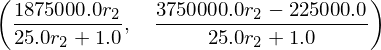

In [11]:
eq1 = solve([dXdt,dYdt], X, Y)[3]
eq1

In [12]:
solve(eq1[0], r2)

In [13]:
solveset(eq1[0] > 0, r2, sp.Reals)

In [14]:
solve(eq1[1], r2)

In [15]:
solveset(eq1[1] > 0, r2, sp.Reals)

# Problem 2: Discrete Dynamical System

In [28]:
x1, x2, a = sp.symbols('x1 x2 a')
deltaX1, deltaX2 = x1 + x2, 2*x1**2 - x2 + a
sp.init_printing()

In [29]:
deltaX1

In [30]:
deltaX2

## Equillibrium Points

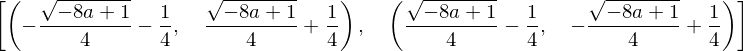

In [35]:
eq2 = solve([deltaX1, deltaX2], x1, x2)
eq2

## Finding $x_1(2)$ and $x_2(2)$

$x_1(0) = 3$  

$x_2(0) = 2$  

**-------------------------------------------------------------**

$\Delta x_1 = x_1 + x_2 = 3 + 2 = 5$  

$\Delta x_2 = 2x_1^2 - x_2 + \alpha = 2(3)^2 - 2 + 1 = 17$  

$x_1(1) = x_1(0) + \Delta x_1 = 3 + 5 = 8$  

$x_2(1) = x_2(0) + \Delta x_2 = 2 + 17 = 19$  

**-------------------------------------------------------------**

$\Delta x_1 = x_1 + x_2 = 8 + 19 = 27$  

$\Delta x_2 = 2x_1^2 - x_2 + \alpha = 2(8)^2 - 19 + 1 = 110$  


$x_1(2) = x_1(1) + \Delta x_1 = 8 + 27 = 35$  

$x_2(2) = x_2(1) + \Delta x_2 = 19 + 110 = 129$  

In [20]:
def delta_X1(x_1, x_2):
    return x_1 + x_2


def delta_X2(x_1, x_2, alpha):
    return 2*m.pow(x_1, 2) - x_2 + alpha

In [32]:
x1_, x2_, alpha = 3, 2, 1
x1_list, x2_list = [],[]
x1_list.append(x1_)
x2_list.append(x2_)
for i in range(2):
    x1_new = x1_list[i] + delta_X1(x1_list[i], x2_list[i])
    x2_new = x2_list[i] + delta_X2(x1_list[i], x2_list[i], alpha)
    x1_list.append(x1_new)
    x2_list.append(x2_new)
    
    
data1 = {'X_1': x1_list, 'X_2': x2_list}
df1 = pd.DataFrame.from_dict(data1)
df1

,X_1,X_2
0,3.0,2.0
1,8.0,19.0
2,35.0,129.0


In [33]:
print('The value for x1(2) is: {}'.format(df1['X_1'].iloc[2]))

The value for x1(2) is: 35.0


In [34]:
print('The value for x2(2) is: {}'.format(df1['X_2'].iloc[2]))

The value for x2(2) is: 129.0


# Problem 3:

**For what values of α does the system in question 2 have no real equilibrium points? Justify.**

* Because of the negative in the square root term, if $\alpha > 0$, you'll end up with imaginary parts. 